In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline, CubicHermiteSpline, lagrange
import sympy as sp

# Laboratorio 04: Interpolación.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Miguel Angel Perdomo Gaitan
*Métodos computacionales 2025-I*

---

# 1.

Un automóvil que viaja a lo largo de una carretera recta es cronometrado en varios puntos. Los datos de las observaciones se dan en la siguiente tabla, donde el tiempo está en segundos, la distancia en metros y la velocidad en metros por segundo.

```
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
```

- Usar un polinomio de Hermite y de Splines Cúbicos para predecir la posición del automóvil y su velocidad cuando $t=10$ s.
- ¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

In [2]:
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo#Aquí va su código
#Hermite
poly_hermite_desplazamiento= CubicHermiteSpline(tiempos,distancias,velocidades) #polinomio que indica el desplazamiento
print(f"la posición del objeto en t=10s (método hermite) es: {poly_hermite_desplazamiento(10):.2f} m") #posición del objeto en t=10s con el polinomio de hermite
#para la velocidad: 
poly_hermite_velocidad=poly_hermite_desplazamiento(10,nu=1)
print(f"la velocidad del objeto en t=10s (método hermite) es: {poly_hermite_velocidad} m/s")
#Splines Cúbicos
poly_cubicspline_desplazamientos=CubicSpline(tiempos, distancias)
#se imprime el resultado para t=10s
print(f"la posición del objeto en t=10s (método CubicSpline) es:{poly_cubicspline_desplazamientos(10):.2f} m")
#para la velocidad
poly_cubicspline_velocidad=CubicSpline(tiempos,velocidades)
#se imprime el resultado para t=10s
print(f"la velocidad del objeto en t=10s (método CubicSpline) es:{poly_cubicspline_velocidad(10):.2f} m/s")

la posición del objeto en t=10s (método hermite) es: 771.96 m
la velocidad del objeto en t=10s (método hermite) es: 74.64 m/s
la posición del objeto en t=10s (método CubicSpline) es:778.42 m
la velocidad del objeto en t=10s (método CubicSpline) es:68.62 m/s


In [3]:
#se encuentra la velocidad máxima en cada intervalo
t=np.linspace(np.min(tiempos),np.max(tiempos),1000)
#para Hermite
velocidad_hermite=poly_hermite_desplazamiento(t,nu=1)
valor_maximo_hermite=np.max(velocidad_hermite)
print(f"la velocidad máxima con Hermite es: {valor_maximo_hermite:.2f} m/s")
#para CubicSpline
velocidad_CubicSpline=poly_cubicspline_velocidad(t)
valor_maximo_CubicSpline=np.max(velocidad_CubicSpline)
print(f"la velocidad máxima con CubicSpline es {valor_maximo_CubicSpline:.2f} m/s")

la velocidad máxima con Hermite es: 82.00 m/s
la velocidad máxima con CubicSpline es 80.00 m/s


# 2.
Los valores de la aceleración gravitacional $g$ dependen de la altitud $y$ según se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar el valor de la aceleración gravitacional a las altitudes de 5,000 m, 42,000 m y 90,000 m. Grafique la distribución de la función de interpolación obtenida junto con los datos dados.

```
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
```

In [4]:
def diferencia_dividida(x, y, i, j):
    '''
    Calcula recursivamente la diferencia dividida f[x_i, x_{i+1}, ..., x_j]
    Entradas:
      x: array de puntos x
      y: array de puntos y
      i: indice del primer punto
      j: indice del ultimo punto
    Salidas:
      a: coeficiente diferencia dividida (i,j)
    '''
    if i == j:
        return y[i]
    else:
        num = diferencia_dividida(x, y, i + 1, j) - diferencia_dividida(x, y, i, j - 1)
        den = x[j] - x[i]
        return num / den

def coeficientes_a(x, y):
    '''
    Calcula los coeficientes a_i del polinomio de Newton.
    Entradas:
      x: array de puntos x
      y: array de puntos y
    Salidas:
      coeficientes: array de coeficientes a_i
    '''
    n = len(x)
    coeficientes = np.zeros_like(x, dtype=float)
    for i in range(n):
        coeficientes[i] = diferencia_dividida(x, y, 0, i)
    return coeficientes

def Polinomio_Newton(x, y):
  '''
  Calcula el polinomio de Newton a partir de los puntos (x, y)
  Entradas:
    x: array de puntos x
    y: array de puntos y
  Salidas:
    P: polinomio de Newton como una función de x
  '''
  coef = coeficientes_a(x, y)
  def P(x_val):
    resultado = coef[0]
    producto = 1
    for i in range(1, len(x)):
      producto *= (x_val - x[i - 1])
      resultado += coef[i] * producto
    return resultado
  return P

In [5]:
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
aceleracion_gravitacional=Polinomio_Newton(y,g)
print(f"la aceleración de la gravedad en y=5000 m es:{aceleracion_gravitacional(5000) } m/s²")
print(f"la aceleración de la gravedad en y=42000 m es:{aceleracion_gravitacional(42000) } m/s²")
print(f"la aceleración de la gravedad en y=90000 m es:{aceleracion_gravitacional(90000)} m/s²")

la aceleración de la gravedad en y=5000 m es:9.794654101562498 m/s²
la aceleración de la gravedad en y=42000 m es:9.681858665 m/s²
la aceleración de la gravedad en y=90000 m es:9.538415625 m/s²


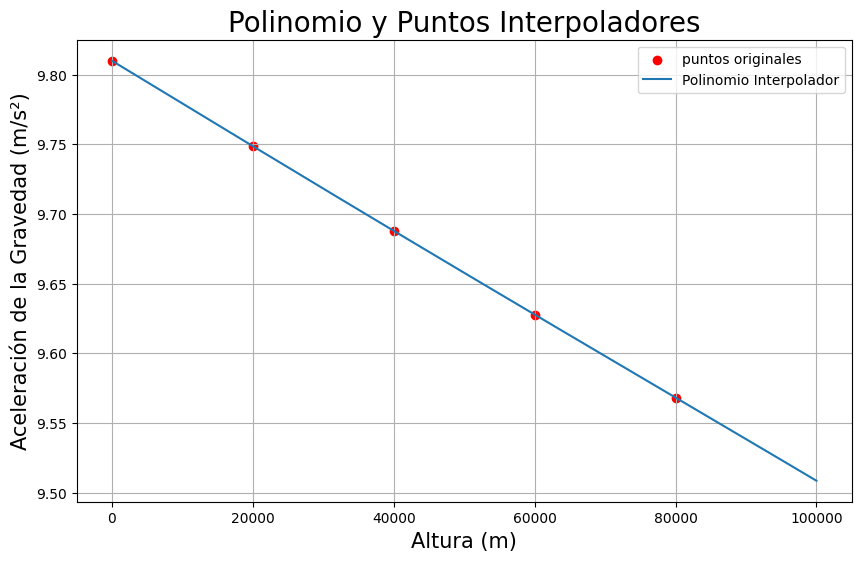

In [6]:
#Grafica
plt.figure(figsize=(10,6))
plt.scatter(y,g, label="puntos originales",color="red")
x=np.linspace(0,100000,100000)
plt.plot(x,aceleracion_gravitacional(x),label="Polinomio Interpolador")
plt.title("Polinomio y Puntos Interpoladores",fontsize=20)
plt.xlabel("Altura (m)", fontsize=15)
plt.ylabel("Aceleración de la Gravedad (m/s²)", fontsize=15)
plt.legend()
plt.grid()
plt.show()

# 3.
La densidad del aire $\rho$ depende de la temperatura $T$ como se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar los valores de la densidad del aire a 250 K, 800 K y 3,000 K. Luego, determine la densidad del aire a temperaturas desde 100 K hasta 2,500 K en intervalos de 10 K. Grafique la distribución de la densidad del aire calculada en función de la temperatura.

```
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
```



In [11]:
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
#ya se hizo anteriomente el código para interpolar por el método de newton, así:
densidad_aire=Polinomio_Newton(T,rho)
print(f"ρ en T= 250k , 800 K y 3.000 k es respectivamente: {densidad_aire(250):.2f}, {densidad_aire(800):.2f}, {densidad_aire(3000):.2f}")

ρ en T= 250k , 800 K y 3.000 k es respectivamente: 1.40, 0.52, -16143.80


C:\Users\migue\AppData\Local\Temp\ipykernel_6688\957263658.py:48: RuntimeWarning: overflow encountered in scalar multiply
  producto *= (x_val - x[i - 1])


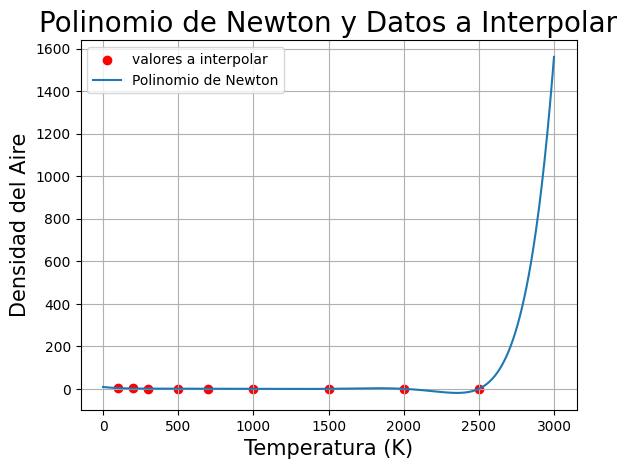

In [14]:
#se realiza la gráfica
x_interp=np.linspace(0,3000,1000)
#se gráfican los puntos
plt.scatter(T,rho, label="valores a interpolar", color="red")
#Polinomio interpolador
plt.plot(x_interp, densidad_aire(x_interp), label="Polinomio de Newton")
plt.grid()
plt.title("Polinomio de Newton y Datos a Interpolar", fontsize=20)
plt.xlabel("Temperatura (K)", fontsize=15)
plt.ylabel("Densidad del Aire", fontsize=15)
plt.legend()
plt.show()

# 4.
Uno de los dispositivos más precisos para medir temperatura es el termómetro de resistencia de platino, también conocido como RTD. En este dispositivo, un alambre delgado y largo de platino se enrolla alrededor de un carrete y se encapsula en una cubierta de acero inoxidable. La resistencia del alambre cambia de manera muy lineal con la temperatura. Una longitud típica de alambre tiene una resistencia de aproximadamente 100 $\Omega$ a $0^{\circ}$ C y cambia alrededor de 0.39 $\Omega/^{\circ}$ C. Por lo tanto, para medir temperaturas con precisión, es necesario poder medir cambios en la resistencia con alta resolución. Tradicionalmente, se ha utilizado el circuito de puente desequilibrado para esto, como se ilustra en la figura, el cual proporciona un voltaje de salida pequeño que es proporcional (aunque no linealmente) a la resistencia del sensor.

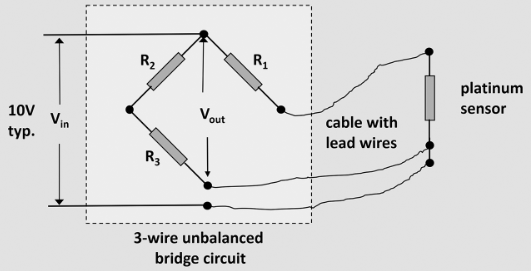




A continuación se presentan mediciones tomadas de dicho circuito, con $R_1 = R_2 = 5$ $k\Omega$ y $R_3 = 120$ $\Omega$:

```
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
```

Un termómetro de resistencia de platino estándar de 100 $\Omega$ tiene una resistencia de 139.27 $\Omega$ a $100^\circ$ C. Utilice el método de interpolación que desee para estimar el voltaje de salida del puente en estas condiciones. Si la salida del puente se mide en 0 voltios, estime la resistencia medida. ¿Qué conclusión puede obtener?

In [39]:
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
#Polinomio interpolador con CubicSpline
Poly_CubicSpline=CubicSpline(resistencia,voltaje) #polinomio interpolador 
print(f"para las condiciones dadas el voltaje es {Poly_CubicSpline(139.27)} voltios")

para las condiciones dadas el voltaje es -0.3701534922704801 voltios


In [40]:
#para v=0 voltios se realiza una interpolación inversa
Poly_inverso=CubicSpline(voltaje[::-1],resistencia[::-1]) #para que CubicSpline funcione correctamente, x debe estar en orden creciente, por ello se invierte el orden de x
print(f"para las condiciones dadas y v=0 r= {Poly_inverso(0):.2f} Ω")

para las condiciones dadas y v=0 r= 120.00 Ω


Como la resistencia disminuye, implica una menor temperatura para el circuito.

# 5.
El índice de refracción del vidrio de borosilicato a diferentes longitudes de onda se presenta en la siguiente tabla. Estime la longitud de onda donde el índice de refracción es 1.520.

```
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])
```

In [44]:
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])
#Se nos pide hallar la longitud de onda, así que x=indice_refraccion
#se usa CubicSpline
poly_lagrange=CubicSpline(indice_refraccion,lambda_angstrom)
#se imprime para indice_refraccion=1.520
print(f" la longitud de onda para indice de refraccion = 1.520 es: {poly_lagrange(1.520):.2f} Å")

 la longitud de onda para indice de refraccion = 1.520 es: 4482.27 Å
